In [1]:
import numpy as np
import pandas as pd
import scipy as sp 
import sys 
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, globalenv

import os
os.environ["R_LIBS_USER"] = "/usr/local/lib/R/site-library"



# Importing other functions
import sys
sys.path.append(os.path.join('functions'))
from gamlass_main import *
from utils import *
from model_utils import *

import rpy2.robjects as ro
from rpy2.robjects.packages import importr
# Load the necessary R packages
gamlss = importr('gamlss')
base = importr('base')


%reload_ext autoreload
%autoreload 2

# import warnings
# warnings.filterwarnings("ignore")

from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)


/home/nitin01/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ModuleNotFoundError: No module named 'rpy2'

### Tesing functions
=> The below command helps to get all the sub functions a module can offer

In [ ]:
gamlss = importr('gamlss')
functions = robjects.r('''
ls(pos = "package:gamlss")
''')
print(functions)

  [1] "acfResid"            "add1All"             "add1TGD"            
  [4] "bfp"                 "bp"                  "calibration"        
  [7] "centiles"            "centiles.com"        "centiles.fan"       
 [10] "centiles.pred"       "centiles.split"      "chooseDist"         
 [13] "chooseDistPred"      "coefAll"             "cs"                 
 [16] "cs.control"          "CV"                  "cy"                 
 [19] "cy.control"          "devianceIncr"        "drop1All"           
 [22] "drop1TGD"            "dtop"                "ECDF"               
 [25] "edf"                 "edfAll"              "find.hyper"         
 [28] "findPower"           "fitDist"             "fitDistPred"        
 [31] "fittedPlot"          "fp"                  "fv"                 
 [34] "GAIC"                "GAIC.scaled"         "GAIC.table"         
 [37] "gamlss"              "gamlss.control"      "gamlss.cs"          
 [40] "gamlss.cy"           "gamlss.fp"           "gamlss.lo"   

#### Function help

In [ ]:
stats = importr('stats')
help_aic = robjects.r('''
help(AIC)
''')
print(help_aic)

File: /tmp/RtmpZccnZj/Rtxt2630c6658a88a5
AIC                   package:stats                    R Documentation



Akaike's An Information Criterion



Description:



     Generic function calculating Akaike's ‘An Information Criterion’

     for one or several fitted model objects for which a log-likelihood

     value can be obtained, according to the formula -2*log-likelihood

     + k*npar, where npar represents the number of parameters in the

     fitted model, and k = 2 for the usual AIC, or k = log(n) (n being

     the number of observations) for the so-called BIC or SBC

     (Schwarz's Bayesian criterion).



Usage:



     AIC(object, ..., k = 2)

     

     BIC(object, ...)

     

Arguments:



  object: a fitted model object for which there exists a ‘logLik’

          method to extract the corresponding log-likelihood, or an

          object inheriting from class ‘logLik’.



     ...: optionally more fitted model objects.



       k: numeric, the _penalty_ per para

In [4]:
function = robjects.r('''
help(pSHASHo2)
''')
print(function)

File: /tmp/RtmpZccnZj/Rtxt2630c66e7babd0
SHASH               package:gamlss.dist                R Documentation



The Sinh-Arcsinh (SHASH) distribution for fitting a GAMLSS



Description:



     The Sinh-Arcsinh (SHASH) distribution is a four parameter

     distribution, for a ‘gamlss.family’ object to be used for a GAMLSS

     fitting using the function ‘gamlss()’.  The functions ‘dSHASH’,

     ‘pSHASH’, ‘qSHASH’ and ‘rSHASH’ define the density, distribution

     function, quantile function and random generation for the

     Sinh-Arcsinh (SHASH) distribution.



     There are 3 different SHASH distributions implemented in GAMLSS.



Usage:



     SHASH(mu.link = "identity", sigma.link = "log", nu.link = "log", 

           tau.link = "log")

     dSHASH(x, mu = 0, sigma = 1, nu = 0.5, tau = 0.5, log = FALSE)

     pSHASH(q, mu = 0, sigma = 1, nu = 0.5, tau = 0.5, lower.tail = TRUE, 

          log.p = FALSE)

     qSHASH(p, mu = 0, sigma = 1, nu = 0.5, tau = 0.5, lower.tail 

#### Datasets

In [5]:
# Importing dataframes
lifespan_train = pd.read_csv("../data/lifespan_train_dataset_no_abcd_vinod.csv", low_memory=False)
lifespan_test = pd.read_csv("../data/lifespan_test_dataset_no_abcd_vinod.csv", low_memory=False)
lifespan_patient = pd.read_csv("../data/lifespan_patient_dataset_vinod.csv", low_memory=False)

# This needed to be done because the column names had '-' and '&' which were not being recognized by R and cause errors
lifespan_train.columns = [col.replace('-', '_') for col in lifespan_train.columns]
lifespan_train.columns = [col.replace('&', '_') for col in lifespan_train.columns]

In [6]:
list(lifespan_train.columns)

['participant_id',
 'age',
 'sex',
 'site',
 'group',
 'lh_euler',
 'rh_euler',
 'lh_G_S_frontomargin_thickness',
 'lh_G_S_occipital_inf_thickness',
 'lh_G_S_paracentral_thickness',
 'lh_G_S_subcentral_thickness',
 'lh_G_S_transv_frontopol_thickness',
 'lh_G_S_cingul_Ant_thickness',
 'lh_G_S_cingul_Mid_Ant_thickness',
 'lh_G_S_cingul_Mid_Post_thickness',
 'lh_G_cingul_Post_dorsal_thickness',
 'lh_G_cingul_Post_ventral_thickness',
 'lh_G_cuneus_thickness',
 'lh_G_front_inf_Opercular_thickness',
 'lh_G_front_inf_Orbital_thickness',
 'lh_G_front_inf_Triangul_thickness',
 'lh_G_front_middle_thickness',
 'lh_G_front_sup_thickness',
 'lh_G_Ins_lg_S_cent_ins_thickness',
 'lh_G_insular_short_thickness',
 'lh_G_occipital_middle_thickness',
 'lh_G_occipital_sup_thickness',
 'lh_G_oc_temp_lat_fusifor_thickness',
 'lh_G_oc_temp_med_Lingual_thickness',
 'lh_G_oc_temp_med_Parahip_thickness',
 'lh_G_orbital_thickness',
 'lh_G_pariet_inf_Angular_thickness',
 'lh_G_pariet_inf_Supramar_thickness',
 'lh_

In [7]:
lifespan_train.iloc[:,-40:].isnull().sum()
lifespan_train.shape

(23657, 229)

#### Fitting models

In [8]:
# Defining x and y variables for GAMLASS
y_val = 'lh_G_cingul_Post_dorsal_thickness'
x_vals = ['age', 'sex', 'site']
columns = x_vals.copy()
columns.extend([y_val])

# Selecting the columns for the training data
df_train = lifespan_train.loc[:1000, columns]

# Create an instance of the Gamlss class
model_name = 'model_shash'
gamlss_model = Gamlss(model_name, x_vals, y_val)

# Fitting the model
gamlss_model.fit(
    r_code="""
    {model_name} <- gamlss({y_val} ~ pb({x_vals[0]}) + {x_vals[1]}, 
    sigma.formula = ~ pb({x_vals[0]}), 
    nu.formula = ~ 1, 
    tau.formula = ~ 1,
      data = r_data, family = SHASH(), method = RS(100))
    """, data=df_train
)

# family = SHASH()

GAMLSS-RS iteration 1: Global Deviance = -530.0128 
GAMLSS-RS iteration 2: Global Deviance = -567.7114 
GAMLSS-RS iteration 3: Global Deviance = -593.0418 
GAMLSS-RS iteration 4: Global Deviance = -610.2701 
GAMLSS-RS iteration 5: Global Deviance = -623.3571 
GAMLSS-RS iteration 6: Global Deviance = -633.7544 
GAMLSS-RS iteration 7: Global Deviance = -641.7863 
GAMLSS-RS iteration 8: Global Deviance = -647.5414 
GAMLSS-RS iteration 9: Global Deviance = -652.4564 
GAMLSS-RS iteration 10: Global Deviance = -656.6044 
GAMLSS-RS iteration 11: Global Deviance = -659.8937 
GAMLSS-RS iteration 12: Global Deviance = -662.6018 
GAMLSS-RS iteration 13: Global Deviance = -664.8659 
GAMLSS-RS iteration 14: Global Deviance = -666.7432 
GAMLSS-RS iteration 15: Global Deviance = -668.3043 
GAMLSS-RS iteration 16: Global Deviance = -669.597 
GAMLSS-RS iteration 17: Global Deviance = -670.691 
GAMLSS-RS iteration 18: Global Deviance = -671.6202 
GAMLSS-RS iteration 19: Global Deviance = -672.4113 
GAML

In [9]:
list(robjects.r['model_shash'].rx2('parameters'))

['mu', 'sigma', 'nu', 'tau']

In [8]:
# Testing on the test dataset
lifespan_test = lifespan_train.loc[1000:2000, columns]
predictions = gamlss_model.predict_all(lifespan_test, transform=True, verbose=True)
predictions


Family:  c("GG", "generalised Gamma Lopatatsidis-Green") 
Fitting method: RS(100) 

Call:  gamlss(formula = lh_G_cingul_Post_dorsal_thickness ~  
    pb(age) + sex, sigma.formula = ~pb(age), nu.formula = ~1,  
    tau.formula = ~1, family = GG(), data = r_data,      method = RS(100)) 

Mu Coefficients:
(Intercept)      pb(age)          sex  
   1.229943    -0.001167    -0.004382  
Sigma Coefficients:
(Intercept)      pb(age)  
   -3.81121      0.01385  
Nu Coefficients:
(Intercept)  
      7.814  

 Degrees of Freedom for the fit: 9.137 Residual Deg. of Freedom   991.9 
Global Deviance:     -675.473 
            AIC:     -657.199 
            SBC:     -612.347 


RRuntimeError: Error in eval(Call$data) : object 'r_data' not found


In [ ]:
predictions.describe()

,mu_pred,sigma_pred,nu_pred
count,1001.000000,1001.000000,1.001000e+03
mean,3.171613,0.053487,7.813931e+00
std,0.029508,0.006521,7.108979e-14
min,3.065206,0.047016,7.813931e+00
25%,3.156159,0.048046,7.813931e+00
50%,3.180126,0.050932,7.813931e+00
75%,3.195328,0.057033,7.813931e+00
max,3.216248,0.077080,7.813931e+00


In [ ]:

# Calculate Z-scores for the test data
# DOing gamma her is not good as the code written is for SHASH and they have different paramerters in log link as their output
gamma_z_scores = gamlss_model.z_score(lifespan_test, type = 'gamma')
# shash_z_scores = gamlss_model.z_score(lifespan_test, type = 'shash')

print(gamma_z_scores)
# print(shash_z_scores)

[-1.58758482  1.21462595 -1.27257501 ...  0.16704583  0.11931809
  1.05443692]


In [ ]:
test_z_scores = gamlss_model.z_score(lifespan_test, type = 'gamma')

In [14]:
affected = np.zeros(len(lifespan_test), dtype=int)
affected[:20] = 1


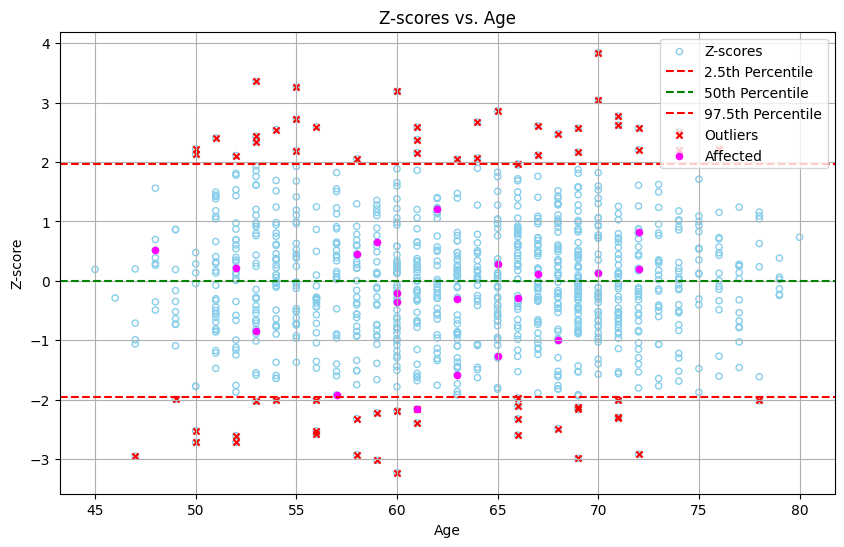

In [25]:
gamlss_model.plot_z_scores(lifespan_test, type = 'gamma', affected=affected)


In [83]:
## To get the summary of the model
# model_summary = base.summary(robjects.r['model_shash'], type = "vcov", digits = 4)
# help_function = robjects.r('''help(summary)''')
# print(help_function)

model_summary = base.summary(robjects.r[model_name])
print(model_summary)

******************************************************************
Family:  c("SHASH", "Sinh-Arcsinh") 

Call:  gamlss(formula = lh_G_cingul_Post_dorsal_thickness ~  
    pb(age) + sex, sigma.formula = ~pb(age), nu.formula = ~sex,  
    tau.formula = ~sex, family = SHASH(), data = r_data,      method = RS(100)) 


Fitting method: RS(100) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4363401  0.0566559  60.653  < 2e-16 ***
pb(age)     -0.0044106  0.0009342  -4.721 2.69e-06 ***
sex         -0.0196178  0.0119992  -1.635    0.102    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.624262   0.206656 -12.699  < 2e-16 ***
pb(age)      0.013811   0.002907   4.

In [12]:
bic = stats.BIC(robjects.r[model_name])[0]
print(bic)

-605.259024081795


#### Plotting

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.0007773579 
                       variance   =  1.002071 
               coef. of skewness  =  -0.01126561 
               coef. of kurtosis  =  3.019875 
Filliben correlation coefficient  =  0.9995491 
******************************************************************


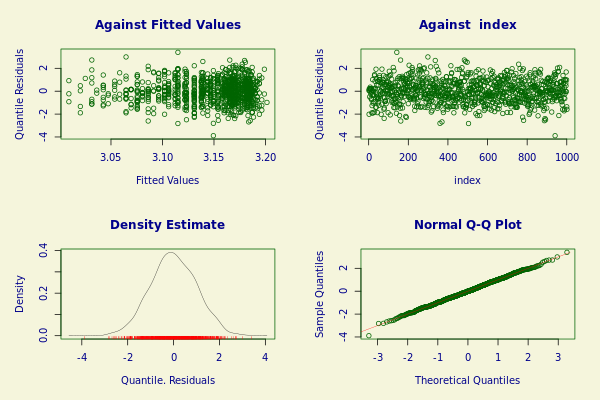

In [13]:
gamlss_model.gamlss_diagnostic_plot()

In [1]:
gamlss_model.plot_diagnostics()

NameError: name 'gamlss_model' is not defined

### Permutation testing

In [15]:
#### Dataset preperations
# Defining x and y variables for GAMLASS
y_val = 'lh_G_cingul_Post_dorsal_thickness'
x_vals = ['age', 'sex', 'site']
columns = x_vals.copy()
columns.extend([y_val])

# Selecting the columns for the training data
df_train = lifespan_train.loc[:1000, columns]

In [16]:
# Define the functions for m_base and m_target
def m_base_func(data):
    # Create an instance of the Gamlss class
    model_name = 'model_shash_base'
    gamlss_model = Gamlss(model_name, x_vals, y_val)
    
    # Fitting the model
    gamlss_model.fit(
        r_code="""
        {model_name} <- gamlss({y_val} ~ pb({x_vals[0]}),
            sigma.formula = ~ pb({x_vals[0]}),
            nu.formula = ~ 1,
            tau.formula = ~ 1,
            data = r_data,
            family = SHASH(),
            method = RS(100))
        """,
        data=data
    )
    
    return gamlss_model

def m_target_func(data):
    # Create an instance of the Gamlss class
    model_name = 'model_shash_target'
    gamlss_model = Gamlss(model_name, x_vals, y_val)
    
    # Fitting the model
    gamlss_model.fit(
        r_code="""
        {model_name} <- gamlss({y_val} ~ pb({x_vals[0]}) + {x_vals[1]},
            sigma.formula = ~ pb({x_vals[0]}),
            nu.formula = ~ 1,
            tau.formula = ~ 1,
            data = r_data,
            family = SHASH(),
            method = RS(100))
        """,
        data=data
    )
    
    return gamlss_model

In [17]:

# Call the permutation_test function with the defined functions
summary, permutations = permutation_test(m_target_func, m_base_func, df_train, y_val, n_permutations=10)


GAMLSS-RS iteration 1: Global Deviance = -530.0128 
GAMLSS-RS iteration 2: Global Deviance = -567.7114 
GAMLSS-RS iteration 3: Global Deviance = -593.0418 
GAMLSS-RS iteration 4: Global Deviance = -610.2701 
GAMLSS-RS iteration 5: Global Deviance = -623.3571 
GAMLSS-RS iteration 6: Global Deviance = -633.7544 
GAMLSS-RS iteration 7: Global Deviance = -641.7863 
GAMLSS-RS iteration 8: Global Deviance = -647.5414 
GAMLSS-RS iteration 9: Global Deviance = -652.4564 
GAMLSS-RS iteration 10: Global Deviance = -656.6044 
GAMLSS-RS iteration 11: Global Deviance = -659.8937 
GAMLSS-RS iteration 12: Global Deviance = -662.6018 
GAMLSS-RS iteration 13: Global Deviance = -664.8659 
GAMLSS-RS iteration 14: Global Deviance = -666.7432 
GAMLSS-RS iteration 15: Global Deviance = -668.3043 
GAMLSS-RS iteration 16: Global Deviance = -669.597 
GAMLSS-RS iteration 17: Global Deviance = -670.691 
GAMLSS-RS iteration 18: Global Deviance = -671.6202 
GAMLSS-RS iteration 19: Global Deviance = -672.4113 
GAML

In [18]:
# Print the summary DataFrame
print("Summary:")
print(summary)

Summary:
    Model         AIC         BIC  P-value (AIC)  P-value (BIC)  \
0  Target -593.942913 -559.390090            0.6            0.6   
1    Base -594.990736 -565.348029            NaN            NaN   

   Convergence Rate  
0               1.0  
1               1.0  


In [19]:
# Print the permutation results
print("\nPermutation Results:")
print(permutations)


Permutation Results:
   AIC_target    AIC_base  BIC_target    BIC_base  Converged_target  \
0 -593.763803 -594.507455 -559.202785 -560.838386              True   
1 -597.859508 -593.781470 -563.326381 -564.158069              True   
2 -594.366833 -596.061385 -559.842337 -566.445604              True   
3 -593.362176 -595.304606 -558.830604 -565.681381              True   
4 -600.579984 -599.586157 -566.048293 -569.962213              True   
5 -594.605010 -592.809188 -560.069084 -563.182547              True   
6 -592.345609 -593.708829 -553.069929 -559.416205              True   
7 -594.820088 -596.423845 -560.272167 -566.785028              True   
8 -593.995728 -595.652727 -559.432286 -565.997742              True   
9 -593.942913 -594.990736 -559.390090 -565.348029              True   

   Converged_base  
0            True  
1            True  
2            True  
3            True  
4            True  
5            True  
6            True  
7            True  
8            Tru

### Comparing Models

In [32]:
#### Dataset preperations
# Defining x and y variables for GAMLASS
y_val = 'lh_G_cingul_Post_dorsal_thickness'
x_vals = ['age', 'sex', 'site']
columns = x_vals.copy()
columns.extend([y_val])

# Selecting the columns for the training data
df_train = lifespan_train.loc[:1000, columns]

In [76]:
# This function gives us the flexibility on what we want to change and what we want to keep constant
# For example, we can keep the nu and tau formula fixed by removing it from this creat_model_func and in the next cell we can
# just change the other parameters or even change the way we want to input

def create_model_func(model_name, mu_formula, sigma_formula, nu_formula, tau_formula):
    def model_func(data):
        gamlss_model = Gamlss(model_name, x_vals, y_val)
        gamlss_model.fit(
            r_code=f"""
            {{model_name}} <- gamlss(
                {y_val} ~ {mu_formula},
                sigma.formula = ~ {sigma_formula},
                nu.formula = ~ {nu_formula},
                tau.formula = ~ {tau_formula},
                data = r_data,
                family = SHASH(),
                method = RS(100)
            )
            """,
            data=data
        )
        return gamlss_model
    return model_func


In [77]:
# Define your model functions using the create_model_func helper
model1_func = create_model_func(
    model_name='model1',
    mu_formula='pb(age)',
    sigma_formula='pb(age)',
    nu_formula='1',
    tau_formula='1'
)

model2_func = create_model_func(
    model_name='model2',
    mu_formula='pb(age) + sex',
    sigma_formula='pb(age)',
    nu_formula='1',
    tau_formula='1'
)

In [78]:
# Compare the models
results_df, summary = compare_models(model1_func, model2_func, data=df_train)

GAMLSS-RS iteration 1: Global Deviance = -524.2578 
GAMLSS-RS iteration 2: Global Deviance = -562.7125 
GAMLSS-RS iteration 3: Global Deviance = -587.8852 
GAMLSS-RS iteration 4: Global Deviance = -605.9772 
GAMLSS-RS iteration 5: Global Deviance = -619.5122 
GAMLSS-RS iteration 6: Global Deviance = -630.1315 
GAMLSS-RS iteration 7: Global Deviance = -637.9623 
GAMLSS-RS iteration 8: Global Deviance = -644.0653 
GAMLSS-RS iteration 9: Global Deviance = -649.2776 
GAMLSS-RS iteration 10: Global Deviance = -653.632 
GAMLSS-RS iteration 11: Global Deviance = -657.0786 
GAMLSS-RS iteration 12: Global Deviance = -659.9068 
GAMLSS-RS iteration 13: Global Deviance = -662.2649 
GAMLSS-RS iteration 14: Global Deviance = -664.2141 
GAMLSS-RS iteration 15: Global Deviance = -665.8322 
GAMLSS-RS iteration 16: Global Deviance = -667.1702 
GAMLSS-RS iteration 17: Global Deviance = -668.3001 
GAMLSS-RS iteration 18: Global Deviance = -669.2587 
GAMLSS-RS iteration 19: Global Deviance = -670.0763 
GAM

In [79]:
# Print the comparison results
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
               AIC         BIC  Converged
Model                                    
model1 -656.453670 -609.982370       True
model2 -656.609728 -605.259024       True


In [80]:
# Print the summary of the best models
print("Summary of Best Models:")
print(summary)

Summary of Best Models:

    Best Model based on AIC: model2
    Difference in AIC from the second-best model-model1 : 0.16
    Difference in BIC from the second-best model-model2 : 0.00
    
    Best Model based on BIC: model1
    Difference in BIC from the second-best model-model2: 4.72
    Difference in AIC from the second-best model-model1: 0.00
    


In [20]:
robjects.r['model_shash'].rx2('converged')[0]

True

In [21]:
robjects.r['model_shash'].rx2('aic')[0]

-656.6097278379174

In [22]:
keys = robjects.r.names(robjects.r['model_shash'])
print(keys)

 [1] "family"             "parameters"         "call"              
 [4] "y"                  "control"            "weights"           
 [7] "G.deviance"         "N"                  "rqres"             
[10] "iter"               "type"               "method"            
[13] "contrasts"          "converged"          "residuals"         
[16] "noObs"              "mu.fv"              "mu.lp"             
[19] "mu.wv"              "mu.wt"              "mu.link"           
[22] "mu.terms"           "mu.x"               "mu.qr"             
[25] "mu.coefficients"    "mu.offset"          "mu.xlevels"        
[28] "mu.formula"         "mu.df"              "mu.nl.df"          
[31] "mu.s"               "mu.var"             "mu.coefSmo"        
[34] "mu.lambda"          "mu.pen"             "df.fit"            
[37] "pen"                "df.residual"        "sigma.fv"          
[40] "sigma.lp"           "sigma.wv"           "sigma.wt"          
[43] "sigma.link"         "sigma.terms"        "

In [23]:
# Make predictions on new data
df_test = lifespan_train.loc[1000:2000, ['age','sex','site', 'lh_G_cingul_Post_dorsal_thickness']]
predictions = gamlss_model.predict(newdata=df_test)
predictions

array([3.17418155, 3.17738134, 3.14939815, ..., 3.0963386 , 3.10598246,
       3.14391426])

In [24]:
predictions.shape

(1001,)

In [25]:
pandas2ri.rpy2py(robjects.r['summary']("model_shash"))

array(['1', 'character', 'character'], dtype='<U9')

#### Note
summary_output = ```robjects.r['summary']("model_shash")``` will call the summary function in R with the argument "model_shash" and assign the result to summary_output. <br>

Alternative:
```robjects.r.summary("model_shash")```

In [26]:
robjects.r['summary']("model_shash")

'1','character','character'


In [27]:
# Assuming you have already fitted the model
r_code = """
    summary_output <- summary(model_shash)
    coefficients <- summary_output$mu.coefficients
    coefficients
"""

In [28]:
robjects.r['AIC'](robjects.r['model_shash'])

-656.609728


In [29]:
robjects.r['BIC'](robjects.r['model_shash'])

-605.259024


In [30]:
pandas2ri.rpy2py(robjects.r['BIC'](robjects.r['model_shash']))

array([-605.25902408])

In [31]:
# Assuming you have already fitted the model
r_code = """
    summary_output <- summary(model_shash)
    coefficients <- summary_output$mu.coefficients
    coefficients
"""
coefficients = robjects.r(r_code)
python_coefficients = pandas2ri.rpy2py(coefficients)
print(python_coefficients)

******************************************************************
Family:  c("SHASH", "Sinh-Arcsinh") 

Call:  gamlss(formula = lh_G_cingul_Post_dorsal_thickness ~  
    pb(age) + sex, sigma.formula = ~pb(age), nu.formula = ~1,  
    tau.formula = ~1, family = SHASH(), data = r_data,      method = RS(100)) 

Fitting method: RS(100) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4424718  0.0557635  61.733  < 2e-16 ***
pb(age)     -0.0045319  0.0009098  -4.981 7.46e-07 ***
sex         -0.0159207  0.0107592  -1.480    0.139    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.691886   0.203224 -13.246  < 2e-16 ***
pb(age)      0.014672   0.002905   5.051 5

                      at cycle:  67 
 
Global Deviance:     -677.5318 
            AIC:     -656.6097 
            SBC:     -605.259 
******************************************************************


RRuntimeError: Error in summary_output$mu.coefficients : 
  $ operator is invalid for atomic vectors


******************************************************************
Family:  c("SHASH", "Sinh-Arcsinh") 

Call:  gamlss(formula = lh_G_cingul_Post_dorsal_thickness ~  
    pb(age), family = SHASH(), data = r_data) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:


              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4226343  0.0573434  59.687  < 2e-16 ***
pb(age)     -0.0043384  0.0009305  -4.662 3.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.00246    0.09197  -21.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Nu link function:  log 
Nu Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.21490    0.05598  -3.839 0.000131 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Tau link function:  log 
Tau Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.11365    0.06633  -1.7

R[write to console]: Error in summary_output$mu.coefficients : 
  $ operator is invalid for atomic vectors



RRuntimeError: Error in summary_output$mu.coefficients : 
  $ operator is invalid for atomic vectors


In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, globalenv
from rpy2.robjects.packages import importr

# Load the necessary R packages
gamlss = importr('gamlss')
base = importr('base')

# Assuming you have already converted your DataFrame to an R DataFrame named 'r_data'

# Fit the GAM model with shash family using gamlss
robjects.r('''
library(gamlss)
model_shash <- gamlss(lh_G_cingul_Post_dorsal_thickness ~ pb(age), data = r_data, family = SHASH())
''')

# Get the model summary
model_summary = base.summary(robjects.r['model_shash'])
print(model_summary)

GAMLSS-RS iteration 1: Global Deviance = -516.1979 
GAMLSS-RS iteration 2: Global Deviance = -550.6078 
GAMLSS-RS iteration 3: Global Deviance = -573.9391 
GAMLSS-RS iteration 4: Global Deviance = -590.7684 
GAMLSS-RS iteration 5: Global Deviance = -602.9684 
GAMLSS-RS iteration 6: Global Deviance = -612.0391 
GAMLSS-RS iteration 7: Global Deviance = -618.8814 
GAMLSS-RS iteration 8: Global Deviance = -624.2218 
GAMLSS-RS iteration 9: Global Deviance = -628.3308 
GAMLSS-RS iteration 10: Global Deviance = -631.54 
GAMLSS-RS iteration 11: Global Deviance = -634.115 
GAMLSS-RS iteration 12: Global Deviance = -636.1934 
GAMLSS-RS iteration 13: Global Deviance = -637.8961 
GAMLSS-RS iteration 14: Global Deviance = -639.2841 
GAMLSS-RS iteration 15: Global Deviance = -640.4168 
GAMLSS-RS iteration 16: Global Deviance = -641.3472 
GAMLSS-RS iteration 17: Global Deviance = -642.1158 
GAMLSS-RS iteration 18: Global Deviance = -642.7536 
GAMLSS-RS iteration 19: Global Deviance = -643.2851 
GAMLS

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/lib/R/site-library’ contains no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/lib/R/site-library’ contains no packages

R[write to console]: 3: 
R[write to console]: In RS() :
R[write to console]:  Algorithm RS has not yet converged



******************************************************************
Family:  c("SHASH", "Sinh-Arcsinh") 

Call:  gamlss(formula = lh_G_cingul_Post_dorsal_thickness ~  
    pb(age), family = SHASH(), data = r_data) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4226343  0.0573434  59.687  < 2e-16 ***
pb(age)     -0.0043384  0.0009305  -4.662 3.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.00246    0.09197  -21.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Nu link function:  log 
Nu Coefficients:
            Estimate S